In [6]:
import pandas as pd
import pickle
import shelve
import feather
import datatable as dtable
import time

import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

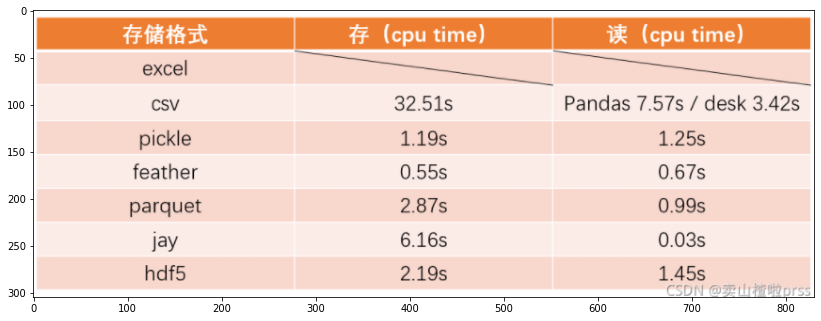

In [3]:
imgw = r"C:\python\function\testfile\DataStorageComparison.PNG"    #使用下面这种形式,只能给绝对路径

with cbook.get_sample_data(imgw) as im_file:
    im = plt.imread(im_file)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.imshow(im)

## !["store"](.\\testfile\DataStorageComparison.PNG)

# pickle

## dump: 数据序列化到文件

In [ ]:
obj1 = ['abc',123,{'a','f'}]
obj2 = 'chi'
obj3 = 'tst'

objlt = [obj1,obj2,obj3]    #如果有多个对象,可以放在列表...里面

with open(r'.\testfile\db\pickle_test\multiobj.pkl','wb') as f:
    pickle.dump(objlt,f)

In [8]:
with open(r'.\testfile\db\pickle_test\multiobj.pkl','rb') as f:
    pickle.load(f)

[['abc', 123, {'a', 'f'}], 'chi', 'tst']

In [9]:
# s = time.time()
fpth = r".\testfile\FFmc0320210126.csv"
%time dt = pd.read_csv(fpth)
# e = time.time()
# print(e-s)

with open(r'.\testfile\db\pickle_test\pdsheet.pkl','wb') as fp:   #文件可以是 txt,pkl
    pickle.dump(dt,fp)

Wall time: 590 ms


In [10]:
# s = time.time()
with open(r'.\testfile\db\pickle_test\pdsheet.pkl','rb') as fp:
    %time dt = pickle.load(fp)
# dt.head(1)
# e = time.time()
# print(e-s)

Wall time: 85.9 ms


## load: 将file中的对象序列化读出

In [11]:
with open(r'.\testfile\db\pickle_test\pickle.txt','rb') as f:
    pickle.load(f)


['abc', 123, {'a', 'f'}]

## dumps:将obj对象序列化为string形式，而不是存入文件中。

In [12]:
obj = ['abc',123,{'a','f'}]
strs = pickle.dumps(obj)
strs

b'\x80\x04\x95\x19\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x03abc\x94K{\x8f\x94(\x8c\x01f\x94\x8c\x01a\x94\x90e.'

## loads:从string中读出序列化前的obj对象。

In [13]:
pickle.loads(strs)

['abc', 123, {'a', 'f'}]

## pd.to_pickle()

In [14]:
fpth = r".\testfile\FFmc0320210126.csv"
%time dt = pd.read_csv(fpth)
dt.to_pickle(r".\testfile\db\pdpickle.pkl")

Wall time: 496 ms


## pd.read_pickle()

In [15]:
%time d = pd.read_pickle(r".\testfile\db\pdpickle.pkl")
d.shape

Wall time: 86.8 ms


(6784, 436)

In [16]:
dp = pd.read_pickle(r'.\testfile\db\pickle_test\pdsheet.pkl')   #用dump存储的DataFrame, 也可以用 read_pickle读取
dp.shape

(6784, 436)

## 检索所支持的格式

In [17]:
pickle.format_version
pickle.compatible_formats

'4.0'

['1.0', '1.1', '1.2', '1.3', '2.0', '3.0', '4.0', '5.0']

# shelve

In [ ]:
import shelve

In [25]:
class Person:
    def __init__(self,name,age,pay=0,job=None):
        self.name = name
        self.age = age
        self.pay = pay
        self.job = job
        
    def lastName(self):
        return self.name.split()[-1]
    def giveRaise(self,percent):
        self.pay *= (1.0+percent)

class Manager(Person):
    def __init__(self,name,age,pay):
        Person.__init__(self,name,age,pay,'manager')
    def giveRaise(self,percent,bonus=0.1):
        Person.giveRaise(self,percent+bonus)

## 写数据

In [ ]:
# 数据准备:
bob = Person('Bob Smith',42,30000,'software')
sue = Person('Sue Jones',45,40000,'hardware')
tom = Manager(name='Tom Doe',age = 50, pay=30000)

In [ ]:
# 将数据写入数据库:
with shelve.open(r".\testfile\db\employeejupyter.db",flag='c',protocol=None,writeback=True) as f:
    f['bob'] = bob
    f['sue'] = sue
    f['tom'] = tom
    print("upload finished!")

In [19]:
%%time
fpth = r".\testfile\FFmc0320210126.csv"
dt = pd.read_csv(fpth)

# s = time.time()
with shelve.open(r".\testfile\db\shelvetest.db",flag='c',protocol=None,writeback=True) as f:
    f['dt'] = dt
    print("upload finished!")
    
# e = time.time()
# print(e-s)

upload finished!
Wall time: 711 ms


In [20]:
%%time
with shelve.open(r".\testfile\db\shelvetest.db",flag='c',protocol=None,writeback=True) as f:
    dt = f['dt']
    print("download finished!")


upload finished!
Wall time: 276 ms


In [23]:
# dt.head(2)

## 读数据

In [ ]:
# 指定key查询数据:
with shelve.open(r".\testfile\db\employeejupyter.db",flag='c',protocol=None,writeback=True) as f:
    person = f['bob']
    
    attrs = ('name','age','job','pay')
    for attr in attrs:
        print(getattr(person,attr))

In [26]:
# 查询数据库里所有条目:
with shelve.open(r".\testfile\db\employeejupyter.db",flag='c',protocol=None,writeback=True) as f:
    attrs = ('name','age','job','pay')
    for key in f:
        person = f[key]
        print(f"{person.name} :")
        for attr in attrs:
            print(getattr(person,attr))
        print("*"*20)
        

Bob Smith :
Bob Smith
42
software
30000
********************
Sue Jones :
Sue Jones
45
hardware
40000
********************
Tom Doe :
Tom Doe
50
manager
30000
********************
osun :
osun
45
hardware
40000
********************


## summary

# feather

In [3]:
fpth = r".\testfile\FFmc0320210126.csv"
dt = pd.read_csv(fpth)

## pandas 操作方法

In [ ]:
# to_feather:
dt.to_feather(r".\testfile\db\featherpd.feather")

In [27]:
%%time
# read_feather:
dt_pd = pd.read_feather(r".\testfile\db\featherpd.feather")

Wall time: 222 ms


## feather 自带方法

In [ ]:
# write_dataframe:
feather.write_dataframe(dt,r".\testfile\db\featherwd.feather")

In [ ]:
# read_dataframe:
dt_f = feather.read_dataframe(r".\testfile\db\featherwd.feather")
dt_f.head(1)

# parquet

In [ ]:
dt.to_parquet(r".\testfile\db\parquetpd.parquet.gzip",compression='gzip',index=None)

In [28]:
%%time
dt_pq = pd.read_parquet(r".\testfile\db\parquetpd.parquet.gzip")
dt_pq.head(1)

Wall time: 583 ms


,Unnamed: 0,SerialNumber,Site,XOnSubstrate,YOnSubstrate,Guid,SoftBin,HardBin,TestThatBinned,E100_Value,...,T085003_Remeasurement_Result,T085004_Remeasurement_Value,T085004_Remeasurement_Result,T085005_Remeasurement_Value,T085005_Remeasurement_Result,T085006_Remeasurement_Value,T085006_Remeasurement_Result,T601001_Final_Value,T601001_Final_Result,Date
0,0,262212960313898587,1,0,0,00000000-0000-0000-0000-000000000000,E3,4,T008010,True,...,Within,0.000359,Within,1246.484,Within,166.4292,Within,604800.0,Within,2021-01-26 08:29:38.840074


# jay

In [5]:
dtable.Frame(dt).to_jay(r".\testfile\db\jaypd.jay")

In [7]:
dtjay = dtable.fread(r".\testfile\db\jaypd.jay")
dtjay.head(1)

,Unnamed: 0,SerialNumber,Site,XOnSubstrate,YOnSubstrate,Guid,SoftBin,HardBin,TestThatBinned,E100_Value,…,T085006_Remeasurement_Value,T085006_Remeasurement_Result,T601001_Final_Value,T601001_Final_Result,Date
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪,,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪
0,0,262212960313898587,1,0,0,00000000-0000-0000-0000-000000000000,E3,4,T008010,1,…,166.429,Within,604800,Within,2021-01-26 08:29:38.840074


In [11]:
dtjaycsv = dtable.fread(fpth)
dtjaycsv.head(1)

,C0,SerialNumber,Site,XOnSubstrate,YOnSubstrate,Guid,SoftBin,HardBin,TestThatBinned,E100_Value,…,T085006_Remeasurement_Value,T085006_Remeasurement_Result,T601001_Final_Value,T601001_Final_Result,Date
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,0,262212960313898587,1,0,0,00000000-0000-0000-0000-000000000000,E3,4,T008010,1,…,166.429,Within,604800,Within,2021-01-26T08:29:38.840074


In [12]:
type(dtjaycsv)

datatable.Frame

## datatable to pandas

In [13]:
dtpd = dtjaycsv.to_pandas()
type(dtpd)

pandas.core.frame.DataFrame

# hdf5

In [ ]:
# dt.to_hdf(r".\testfile\db\")

# pyarrow

# julia

# ZODB